In [1]:
from matgen.base import CellComplex
from matgen import matutils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating cell complex

In [3]:
# Load cell complex from a `.tess` file
filename = 'tests/test_data/pass1_model_2d.txt'
c = CellComplex.from_tess_file(
    filename, 
    with_theta = True, 
    theta_file = 'tests/test_data/pass_1_misorientation.txt',
    lower_thrd = 15)
print(c)

Complex loaded: 0.4 s
<class CellComplex> 2D
3166 vertices
4747 edges
1582 faces


In [4]:
len(c._three_sided_grains)

9

In [5]:
spec_edges = []
non_spec_edges = []
spec_vert = []
non_spec_vert = []

edges = []
for face in c._three_sided_grains.values():
    boundaries_set = set()
    for v in c.get_many('v', face.v_ids):
        boundaries_set.update(v.incident_ids)
        if v.junction_type >= 2:
            spec_vert.append(v.id)
        else:
            non_spec_vert.append(v.id)
    edges += list(boundaries_set)
for edge_id in edges:
    if c.get_one('e', edge_id).is_special:
        spec_edges.append(edge_id)
    else:
        non_spec_edges.append(edge_id)

In [6]:
len(spec_edges)

37

In [7]:
len(non_spec_edges)

17

In [14]:
c.get_three_sided_distribution()

{0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 2, 8: 4, 9: 0, 10: 0}

In [8]:
c.get_three_sided_distribution()

{0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 2, 9: 4, 10: 0}

In [15]:
types = []
for face in c._three_sided_grains.values():
    print(face.id, face.three_sided_type)
    types.append(face.three_sided_type)

340 1
650 8
678 8
693 8
714 7
774 8
825 7
1231 6
1352 6


In [9]:
types = []
for face in c._three_sided_grains.values():
    print(face.id, face.three_sided_type)
    types.append(face.three_sided_type)

340 1
650 9
678 9
693 9
714 8
774 9
825 8
1231 7
1352 7


(array([1., 0., 0., 0., 0., 0., 2., 6.]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [<matplotlib.patches.Polygon at 0x14fb5f7e560>])

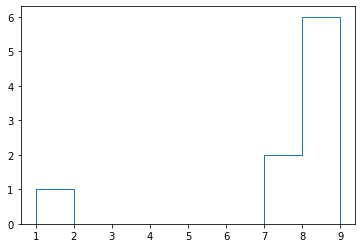

In [10]:
plt.hist(types, histtype='step', bins=8)

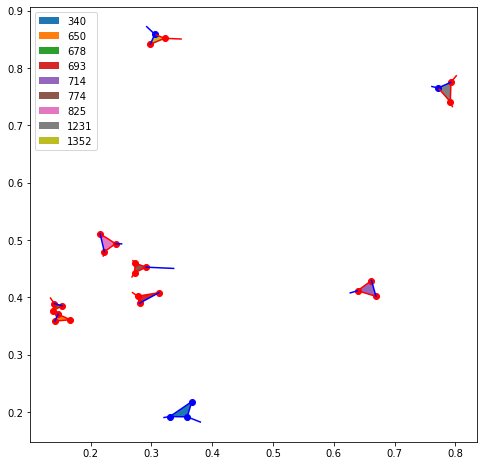

In [11]:
ax = c.plot_faces(c._three_sided_grains.keys(), labels=True)
c.plot_edges(spec_edges, ax=ax, color='r')
c.plot_edges(non_spec_edges, ax=ax, color='b')
c.plot_vertices(spec_vert, ax=ax, color='r')
c.plot_vertices(non_spec_vert, ax=ax, color='b')
plt.show()

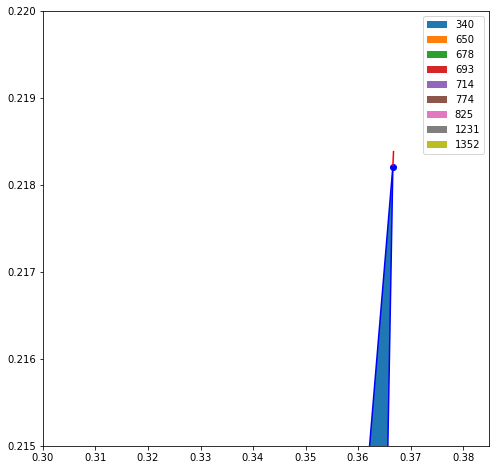

In [12]:
ax = c.plot_faces(c._three_sided_grains.keys(), labels=True)
c.plot_edges(spec_edges, ax=ax, color='r')
c.plot_edges(non_spec_edges, ax=ax, color='b')
c.plot_vertices(spec_vert, ax=ax, color='r')
c.plot_vertices(non_spec_vert, ax=ax, color='b')
ax.set_xlim([0.3, 0.385])
ax.set_ylim([0.215, 0.22])
plt.show()

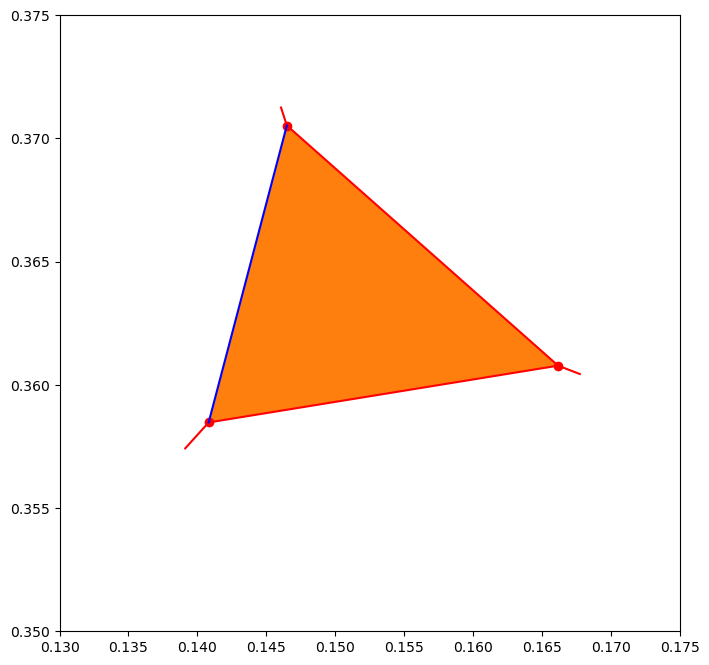

In [20]:
ax = c.plot_faces(c._three_sided_grains.keys())#, labels=True)
c.plot_edges(spec_edges, ax=ax, color='r')
c.plot_edges(non_spec_edges, ax=ax, color='b')
c.plot_vertices(spec_vert, ax=ax, color='r')
c.plot_vertices(non_spec_vert, ax=ax, color='b')
ax.set_xlim([0.13, 0.175])
ax.set_ylim([0.35, 0.375])
plt.show()

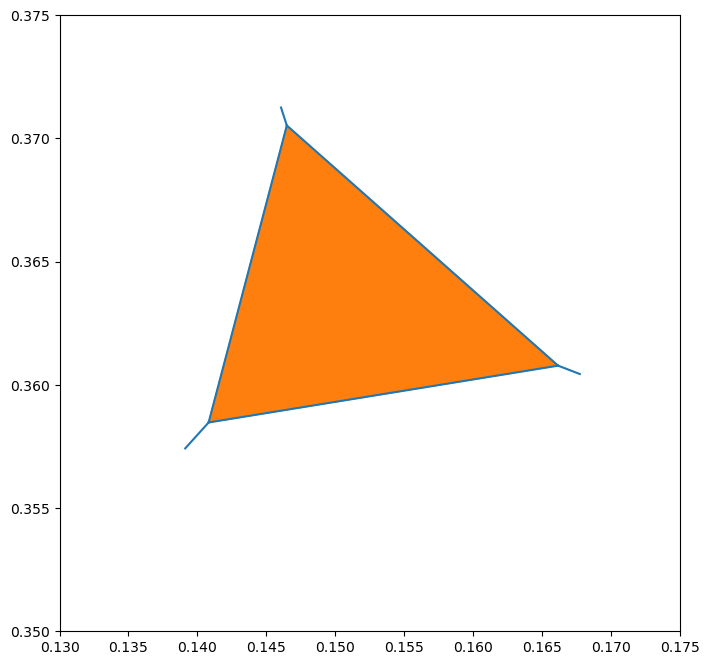

In [22]:
ax = c.plot_faces(c._three_sided_grains.keys(), c='C1')
c.plot_edges(edges, ax=ax, color='C0')
ax.set_xlim([0.13, 0.175])
ax.set_ylim([0.35, 0.375])
plt.show()

In [31]:
c.set_three_sided_types()